In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [2]:
def generate_data(w=[3,5], b=1, data_shape=(1000,2), y_class=2, shuffle=False):
    assert len(w)==data_shape[1], "the w lenghth should equal to the data's second dimension"
    x = np.random.random(data_shape)
    x = np.array(list(map(lambda x:  [i if random.random() < 0.5 else -i for i in x] , x)))
#     y = np.dot(x, w) + b + np.random.random(data_shape[0])
    y = np.square(x)
    y = np.dot(y, w)  + b
#     y = y[:,0]**2 + y[:,1]**2 
#     interval = (np.ceil(y.max()) - np.floor(y.min()))  / y_class
    interval = np.power(8, 1/y_class)
    y_final = y.copy()
    y_max = np.floor(y.min())
    c = list(range(y_class))
    if shuffle:
        random.shuffle(c)
    for i in range(y_class):
        y_min = y_max
        y_max = interval**(i+1) + b 
#         y_max += interval
        mask = (y >= y_min) &(y < y_max)
        y_final[mask] = c[i]
    return x,y_final

In [24]:
def generate_data_2(w=[3,5], b=5, data_shape=(1100,2), y_class=2, percentage=0.6, shuffle=False):
    assert len(w)==data_shape[1], "the w lenghth should equal to the data's second dimension"
    x = np.random.random(data_shape)
    y = np.dot(x, w) + b
    y_range_max = np.sum(w) + 1
#     y_min = b
    interval = y_range_max / y_class
    y_final = y.copy()
    y_max = b
    c = list(range(y_class))
    if shuffle:
        random.shuffle(c)
    for i in range(y_class):
        y_min = y_max
        y_max += interval*(percentage+ (1-percentage)/2)
        mask = (y >= y_min) &(y < y_max)
        y_final[mask] = c[i]
        if i < y_class-1:
            y_min = y_max
            y_max += interval * ((1-percentage)/2)
            mask = (y >= y_min) &(y < y_max)
            y_final[mask] = -c[i] - 1
            y_min = y_max
            y_max += interval* ((1-percentage)/2)
            mask = (y >= y_min) &(y < y_max)
            y_final[mask] = -c[i+1] - 1
            
    x_test = x[(y_final!=1) & (y_final!=0)]
    y_test = y_final[(y_final!=1) & (y_final!=0)]
    y_test = np.abs(y_test + 1)
        
    x = x[(y_final==1) | (y_final==0)]
    y_final = y_final[(y_final==1) | (y_final==0)]

    return x, y_final, x_test, y_test

In [178]:
def plot_the_contour_figure(x, y, m, trans_func=None):
    x_range = np.linspace(np.floor(x[:,0].min()), np.ceil(x[:,0].max()), 100)
    y_range = np.linspace(np.floor(x[:,1].min()), np.ceil(x[:,1].max()), 100)
    X,Y = np.meshgrid(x_range, y_range)
#     plt.figure(figsize=(8,8))
    if not trans_func:
        predict = [m.predict(np.c_[X[i],Y[i]]) for i in range(len(X))]
        predict = np.round(predict)
    else:
        predict = [m.predict(trans_func(np.c_[X[i],Y[i]])) for i in range(len(X))]
        predict = np.round(predict)
#     plt.contour(x_range, y_range, predict, colors='k')
    plt.contourf(x_range, y_range, predict)
    colors = ['r', 'b', 'orange', 'purple', 'm', 'c', 'y', 'k']
    for i in range(len(np.unique(y))):
        mask = y==i
        plt.scatter(x[mask,0], x[mask,1], c=colors[i], s=3)

In [179]:
x, y, x_test, y_test = generate_data_2(percentage=0.8, data_shape=(1000,2))
x, y, _, _ = generate_data_2(percentage=1, data_shape=(100,2))

In [180]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1)
model.fit(x,y)
model.score(x,y)

C:\Users\EastGeno\.conda\envs\tf2_0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.94

In [181]:
model.score(x_test, y_test)

0.6473988439306358

In [182]:
def predict_x2(x1, coef, bias):
    return -(x1 * coef[0] + bias)/coef[1]

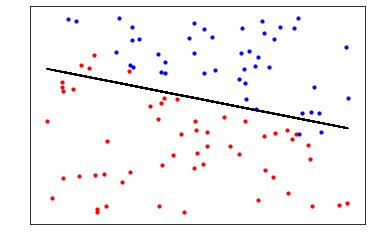

In [183]:
# plt.plot(x[:, 0], model.predict_value(x[:]), color='b')
colors = ['r', 'b', 'orange', 'purple', 'm', 'c', 'y', 'k']
for i in range(len(np.unique(y))):
    mask = y==i
    plt.scatter(x[mask,0][:], x[mask,1][:], c=colors[i], s=10)
plt.plot(x[:,0], predict_x2(x[:,0], model.coef_[0], model.intercept_[0]), color='black')

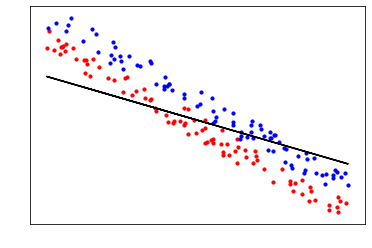

In [184]:
# plt.plot(x[:, 0], model.predict_value(x[:]), color='b')
colors = ['r', 'b', 'orange', 'purple', 'm', 'c', 'y', 'k']
for i in range(len(np.unique(y))):
    mask = y_test==i
#     plt.scatter(x[mask,0][:100], x[mask,1][:100], c=c, s=10)
    plt.scatter(x_test[mask,0][:], x_test[mask,1][:], c=colors[i], s=10)
plt.plot(x_test[:,0], predict_x2(x_test[:,0], model.coef_[0], model.intercept_[0]), color='black')
# plt.plot(x[:,0], predict_x2(x[:,0], model.coef_[1], model.intercept_[1]), color='black')
# plt.plot(x[:,0], predict_x2(x[:,0], model.coef_[2], model.intercept_[2]), color='black')
#     break

In [185]:
from sklearn.svm import SVC
model = SVC()
model.fit(x,y)
model.score(x,y)

C:\Users\EastGeno\.conda\envs\tf2_0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.96

In [186]:
model.score(x_test,y_test)

0.7976878612716763

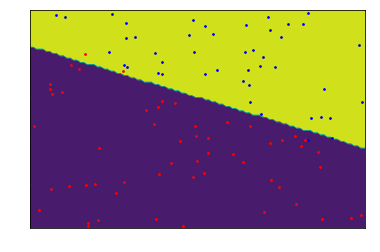

In [187]:
plot_the_contour_figure(x,y,model)

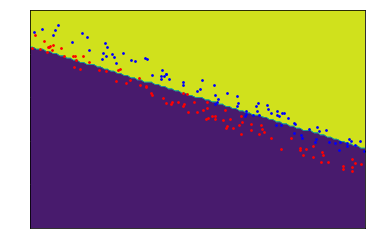

In [188]:
plot_the_contour_figure(x_test, y_test,model)

In [189]:
x, y = generate_data(y_class=2)

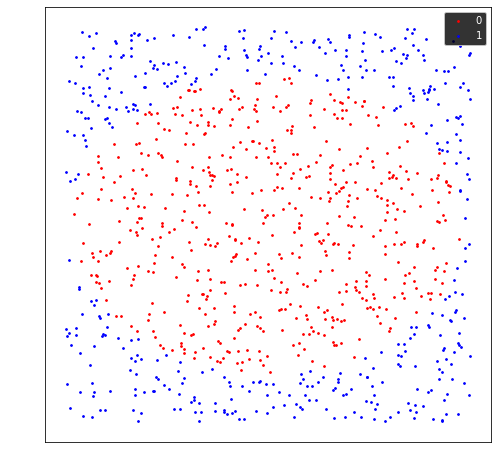

In [190]:
colors = ['r', 'b', 'orange', 'purple', 'm', 'c', 'y', 'k']
plt.figure(figsize=(8,8))
for i in range(len(np.unique(y))):
    mask = y==i
    plt.scatter(x[mask,0], x[mask,1], c=colors[i], s=3, label=str(i))
plt.legend()

In [193]:
model = LogisticRegression()
model.fit(x,y)
model.score(x,y)

C:\Users\EastGeno\.conda\envs\tf2_0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.57

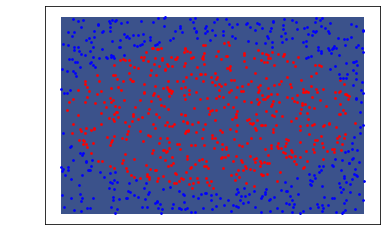

In [194]:
plot_the_contour_figure(x,y,model)

In [195]:
model = SVC()
model.fit(x,y)
model.score(x,y)

C:\Users\EastGeno\.conda\envs\tf2_0\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.982

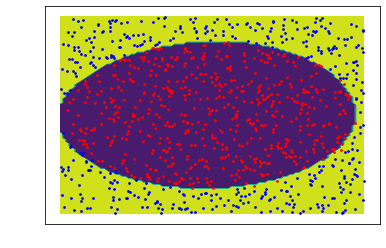

In [196]:
plot_the_contour_figure(x,y,model)

In [80]:
def make_new_feature(x):
    x_len = x.shape[1]
    for i in range(x_len):
        for j in range(i, x_len):
            x = np.c_[x, np.multiply(x[:, i], x[:, j])]
    return x

In [81]:
x_new = make_new_feature(x)

In [82]:
model = LogisticRegression()
model.fit(x_new,y)
model.score(x_new,y)

C:\Users\EastGeno\.conda\envs\tf2_0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.982

C:\Users\EastGeno\.conda\envs\tf2_0\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'color'
  del sys.path[0]


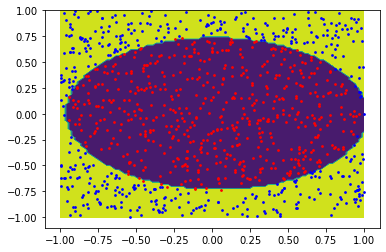

In [83]:
plot_the_contour_figure(x_new,y, model, trans_func=make_new_feature)